# [Insert Title]
### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor  #Decision Tree Regression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from sklearn import preprocessing # encoding
import statsmodels.api as sm # anova tests
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
import xgboost as xgb # XGBoost Ensemble Tree

### Load data into DataFrame

In [2]:
df = pd.read_csv('car-dataset.csv')
df.head()

,make,model,year,body,mileage,fuel,transmission,engineSize,enginePower,price
0,Jaguar,S-Type,2007.0,saloon,52112.0,Diesel,Automatic,2.7,280.0,5799.0
1,BMW,X1,2014.0,suv,45580.0,Diesel,Automatic,2.0,250.0,11500.0
2,Land,Rover Range Rover Sport,2011.0,estate,100620.0,Diesel,Automatic,3.0,333.0,14809.0
3,Land,Rover Range Rover Sport,2012.0,estate,67640.0,Diesel,Automatic,3.0,347.0,17402.0
4,BMW,6 Series,2010.0,convertible,67112.0,Diesel,Automatic,3.0,389.0,12499.0


In [3]:
# shape
df.shape

(82137, 10)

In [4]:
# data columns
df.columns

Index(['make', 'model', 'year', 'body', 'mileage', 'fuel', 'transmission',
       'engineSize', 'enginePower', 'price'],
      dtype='object')

In [5]:
# data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82137 entries, 0 to 82136
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          82137 non-null  object 
 1   model         82137 non-null  object 
 2   year          73418 non-null  float64
 3   body          77067 non-null  object 
 4   mileage       81901 non-null  float64
 5   fuel          81522 non-null  object 
 6   transmission  77412 non-null  object 
 7   engineSize    79306 non-null  float64
 8   enginePower   62352 non-null  float64
 9   price         82137 non-null  float64
dtypes: float64(5), object(5)
memory usage: 6.3+ MB


In [6]:
# unique values
print(f"make:   {str(len(df.make.unique()))}")
print(f"model:   {str(len(df.model.unique()))}")
print(f"body:   {str(len(df.body.unique()))}")
print(f"fuel:   {str(len(df.fuel.unique()))}")
print(f"transmission:   {str(len(df.transmission.unique()))}")

make:   72
model:   752
body:   16
fuel:   5
transmission:   4


In [7]:
# most frequent value
print(f"make:   {str(df.make.mode())}")
print(f"model:   {str(df.model.mode())}")
print(f"body:   {str(df.body.mode())}")
print(f"fuel:   {str(df.fuel.mode())}")
print(f"transmission:   {str(df.transmission.mode())}")

make:   0    Ford
Name: make, dtype: object
model:   0    Fiesta
Name: model, dtype: object
body:   0    hatchback
Name: body, dtype: object
fuel:   0    Diesel
Name: fuel, dtype: object
transmission:   0    Manual
Name: transmission, dtype: object


In [8]:
# most frequent count
print(f"make:   {str(df.make.value_counts().max())}")
print(f"model:   {str(df.model.value_counts().max())}")
print(f"body:   {str(df.body.value_counts().max())}")
print(f"fuel:   {str(df.fuel.value_counts().max())}")
print(f"transmission:   {str(df.transmission.value_counts().max())}")

make:   11174
model:   2767
body:   35724
fuel:   37971
transmission:   40119


##### Statistical Analysis: Numerical Values

In [9]:
df.price.describe()

count     82137.000000
mean      18856.171393
std       14947.934364
min         400.000000
25%        9991.000000
50%       15989.000000
75%       22995.000000
max      459999.000000
Name: price, dtype: float64

In [10]:
df.year.describe()

count    73418.000000
mean      2015.704282
std          3.754433
min       1981.000000
25%       2014.000000
50%       2016.000000
75%       2018.000000
max       2022.000000
Name: year, dtype: float64

In [11]:
df.mileage.describe()

count     81901.000000
mean      45167.113039
std       32567.702178
min           1.000000
25%       19803.000000
50%       38500.000000
75%       65000.000000
max      806320.000000
Name: mileage, dtype: float64

In [12]:
df.engineSize.describe()

count    79306.000000
mean         1.881796
std          0.971209
min          0.300000
25%          1.500000
50%          1.800000
75%          2.000000
max         76.300000
Name: engineSize, dtype: float64

In [13]:
df.enginePower.describe()

count    62352.000000
mean       228.184661
std        114.595989
min         61.000000
25%        156.000000
50%        204.000000
75%        258.000000
max       1035.000000
Name: enginePower, dtype: float64

### check for null values

In [14]:
# method 1
df.isnull().sum()

make                0
model               0
year             8719
body             5070
mileage           236
fuel              615
transmission     4725
engineSize       2831
enginePower     19785
price               0
dtype: int64

In [15]:
# method 2
df.isnull().any()

make            False
model           False
year             True
body             True
mileage          True
fuel             True
transmission     True
engineSize       True
enginePower      True
price           False
dtype: bool

In [16]:
# drop null value rows
df.dropna(inplace=True)

In [17]:
df.isnull().any()

make            False
model           False
year            False
body            False
mileage         False
fuel            False
transmission    False
engineSize      False
enginePower     False
price           False
dtype: bool

In [18]:
df.dtypes

make             object
model            object
year            float64
body             object
mileage         float64
fuel             object
transmission     object
engineSize      float64
enginePower     float64
price           float64
dtype: object

In [19]:
df.year = df.year.astype(int)

In [20]:
df.price = df.price.astype(int)

In [21]:
df.mileage = df.mileage.astype(int)

In [22]:
df.enginePower = df.enginePower.astype(int)

In [23]:
df.dtypes

make             object
model            object
year              int32
body             object
mileage           int32
fuel             object
transmission     object
engineSize      float64
enginePower       int32
price             int32
dtype: object

In [24]:
df.drop_duplicates()

,make,model,year,body,mileage,fuel,transmission,engineSize,enginePower,price
0,Jaguar,S-Type,2007,saloon,52112,Diesel,Automatic,2.7,280,5799
1,BMW,X1,2014,suv,45580,Diesel,Automatic,2.0,250,11500
2,Land,Rover Range Rover Sport,2011,estate,100620,Diesel,Automatic,3.0,333,14809
3,Land,Rover Range Rover Sport,2012,estate,67640,Diesel,Automatic,3.0,347,17402
4,BMW,6 Series,2010,convertible,67112,Diesel,Automatic,3.0,389,12499
...,...,...,...,...,...,...,...,...,...,...
82122,BMW,3 Series,2020,saloon,16871,Hybrid,Automatic,2.0,397,33995
82123,Mercedes-Benz,CLA,2020,saloon,15489,Hybrid,Automatic,1.3,296,36995
82129,BMW,X5,2017,estate,69853,Hybrid,Automatic,2.0,426,35990
82130,BMW,i8,2014,coupe,37329,Hybrid,Automatic,1.5,492,40000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49648 entries, 0 to 82134
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          49648 non-null  object 
 1   model         49648 non-null  object 
 2   year          49648 non-null  int32  
 3   body          49648 non-null  object 
 4   mileage       49648 non-null  int32  
 5   fuel          49648 non-null  object 
 6   transmission  49648 non-null  object 
 7   engineSize    49648 non-null  float64
 8   enginePower   49648 non-null  int32  
 9   price         49648 non-null  int32  
dtypes: float64(1), int32(4), object(5)
memory usage: 3.4+ MB


## Exploratory Data Analysis (EDA)

### 1) Univariate Analysis - Categorical Data

#### fuel distribution in listings

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


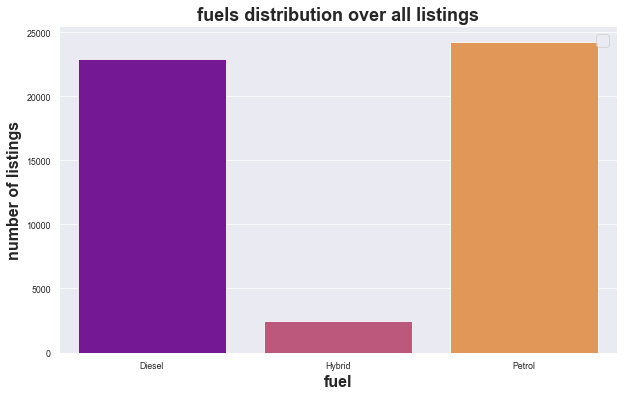

In [272]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
sns.countplot(x="fuel", data=df, palette="plasma")
sns.set_theme("paper")
plt.xlabel("fuel",fontsize=16,fontweight="bold")
plt.ylabel("number of listings",fontsize=16,fontweight="bold")
plt.title('fuels distribution over all listings',fontsize=18, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()

#### transmission distribution in listings

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


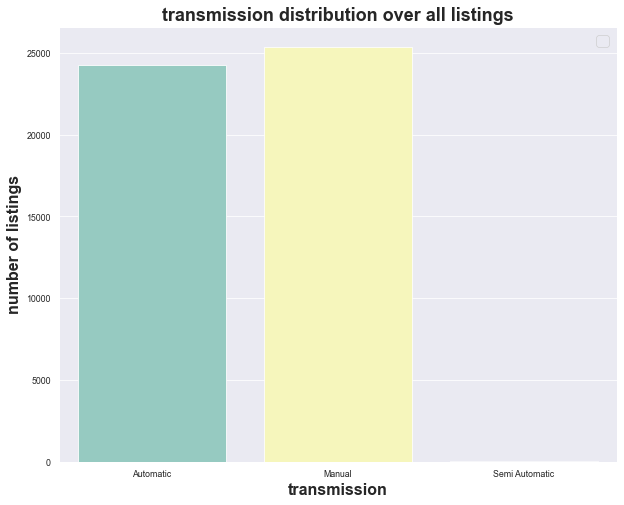

In [309]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca()
sns.countplot(x="transmission", data=df, palette="Set3")
sns.set_theme("paper")
plt.xlabel("transmission",fontsize=16,fontweight="bold")
plt.ylabel("number of listings",fontsize=16,fontweight="bold")
plt.title('transmission distribution over all listings',fontsize=18, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()

#### body distribution in listings

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


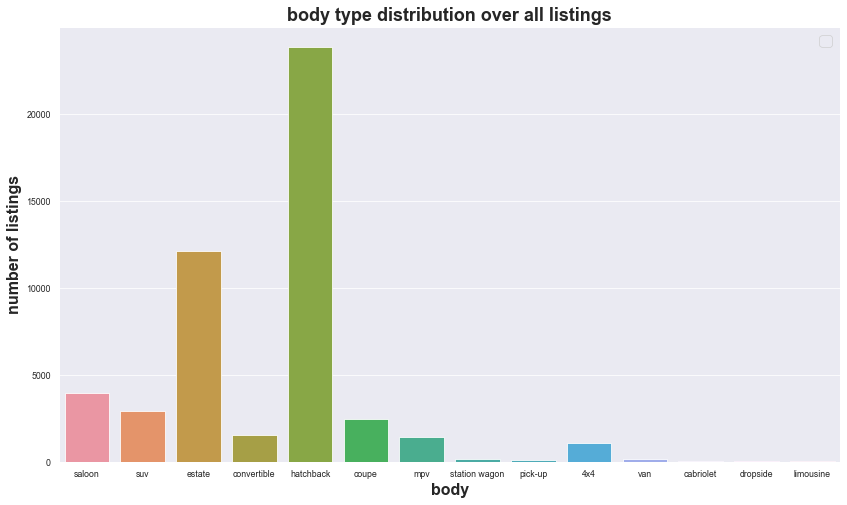

In [305]:
fig = plt.figure(figsize=(14, 8))
ax = fig.gca()
sns.countplot(x="body", data=df)
sns.set_theme("paper")
plt.xlabel("body",fontsize=16,fontweight="bold")
plt.ylabel("number of listings",fontsize=16,fontweight="bold")
plt.title('body type distribution over all listings',fontsize=18, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()

#### make distribution in listings

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


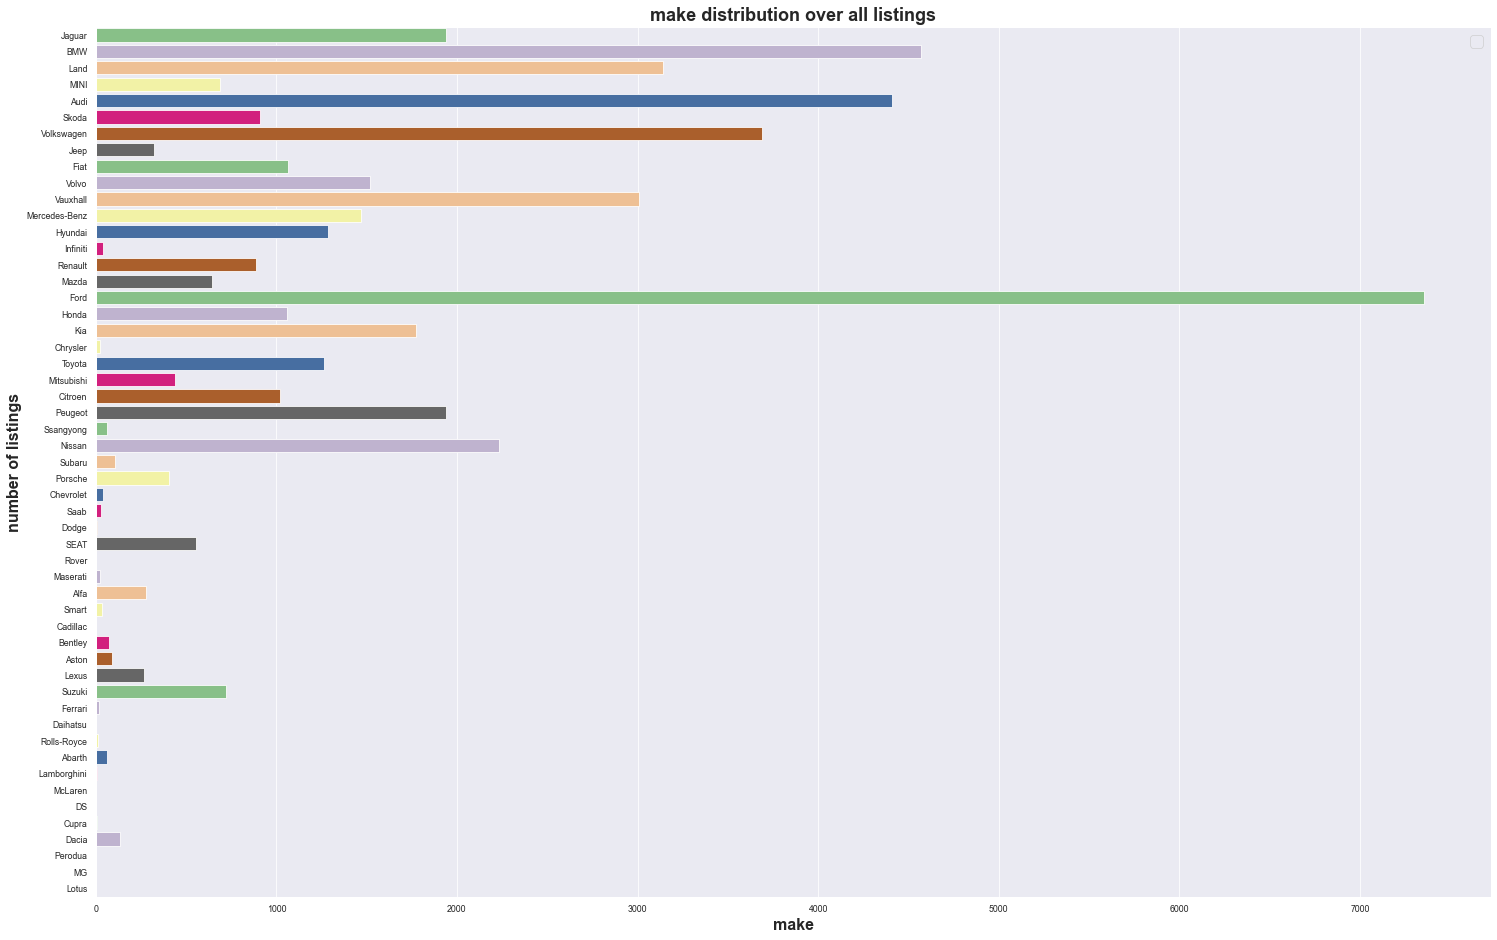

In [285]:
fig = plt.figure(figsize=(25, 16))
ax = fig.gca()
sns.countplot(y="make", data=df, palette="Accent")
sns.set_theme("paper")
plt.xlabel("make",fontsize=16,fontweight="bold")
plt.ylabel("number of listings",fontsize=16,fontweight="bold")
plt.title('make distribution over all listings',fontsize=18, fontweight="bold")
plt.legend(loc='upper right', fontsize=16)
plt.show()

### 2) Univariate Analysis - Numerical Data

#### year quartile graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


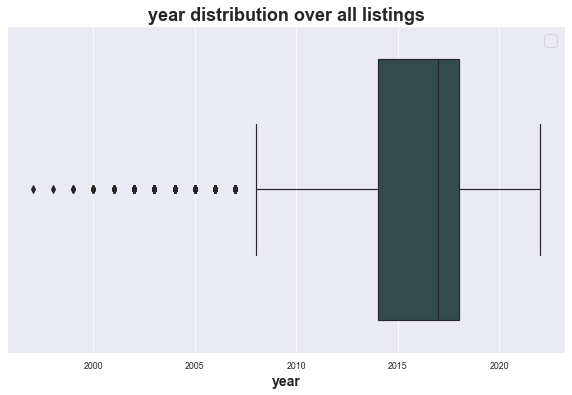

In [291]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
sns.boxplot(x=df.year, orient="h", color="darkslategrey" )
sns.set_theme("paper")
plt.xlabel("year", fontsize=14,fontweight="bold")
plt.title("year distribution over all listings",fontsize=18,fontweight="bold")
plt.legend(loc="upper right", fontsize=16)
plt.show()

#### mileage quartile graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


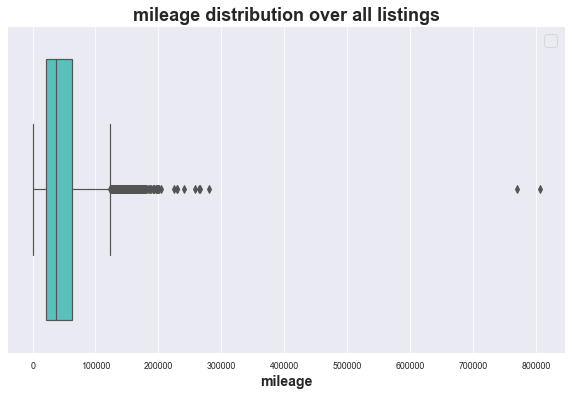

In [293]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
sns.boxplot(x=df.mileage, orient="h", color="mediumturquoise" )
sns.set_theme("paper")
plt.xlabel("mileage", fontsize=14,fontweight="bold")
plt.title("mileage distribution over all listings",fontsize=18,fontweight="bold")
plt.legend(loc="upper right", fontsize=16)
plt.show()

#### engine size quartile graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


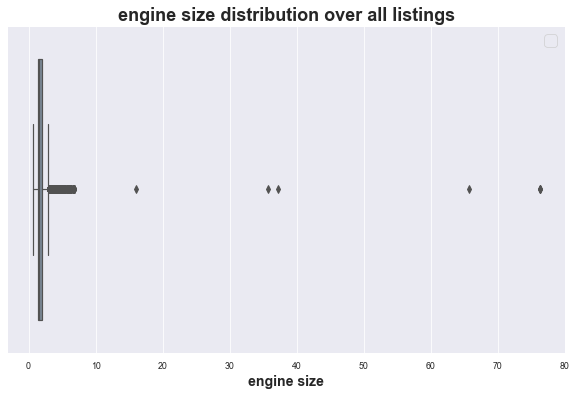

In [295]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
sns.boxplot(x=df.engineSize, orient="h", color="lightslategrey" )
sns.set_theme("paper")
plt.xlabel("engine size", fontsize=14,fontweight="bold")
plt.title("engine size distribution over all listings",fontsize=18,fontweight="bold")
plt.legend(loc="upper right", fontsize=16)
plt.show()

#### engine power quartile graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


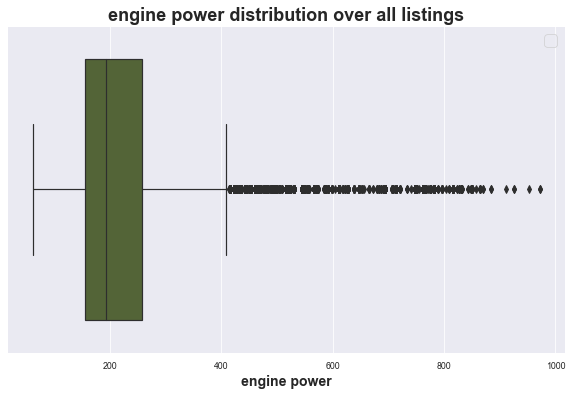

In [297]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
sns.boxplot(x=df.enginePower, orient="h", color="darkolivegreen" )
sns.set_theme("paper")
plt.xlabel("engine power", fontsize=14,fontweight="bold")
plt.title("engine power distribution over all listings",fontsize=18,fontweight="bold")
plt.legend(loc="upper right", fontsize=16)
plt.show()

#### price distribution in all lisitngs

Text(0.5, 1.0, 'car price distribution (original)')

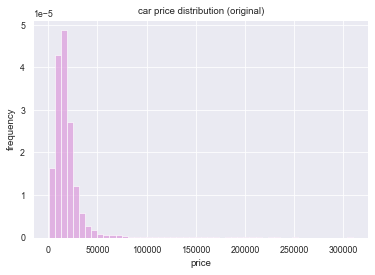

In [302]:
# on actual price
plt.hist(df.price, 50, density=True, facecolor="plum", alpha=0.75)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('car price distribution (original)')

Text(0.5, 1.0, 'car price distribution (log transformed)')

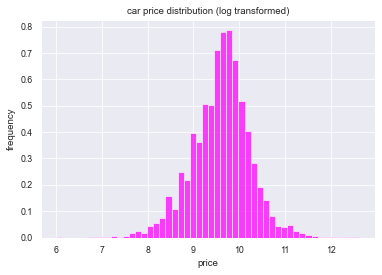

In [303]:
# log transformed price
plt.hist(np.log(df.price), 50, density=True, facecolor="magenta", alpha=0.75)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('car price distribution (log transformed)')

### Data Preprocessing - After Univariate (EDA)

In [26]:
# removed outliers in mileage
miles_outliers_index = df[df["mileage"] > 300000].index
df.drop(miles_outliers_index, inplace=True)
# removed outliers in engine size
size_outliers_index = df[df["engineSize"] > 10].index
df.drop(size_outliers_index, inplace=True)
# shuffled dataframe
df = df.sample(frac=1).reset_index(drop=True)

### 3) Bivariate Analysis

#### price distribution by engine power

<Figure size 3600x1296 with 0 Axes>

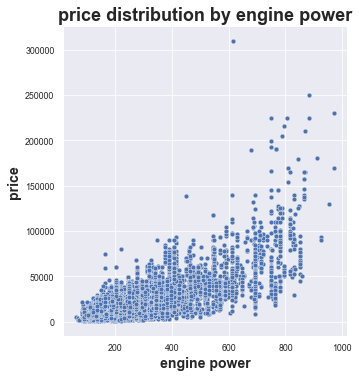

In [372]:
fig = plt.figure(figsize=(50, 18))
sns.relplot(x=df.enginePower, y= df.price)
sns.set_theme("paper")
plt.xlabel("engine power", fontsize=14,fontweight="bold")
plt.ylabel("price", fontsize=14,fontweight="bold")
plt.title("price distribution by engine power",fontsize=18,fontweight="bold")
plt.show()

#### mileage distribution by body type

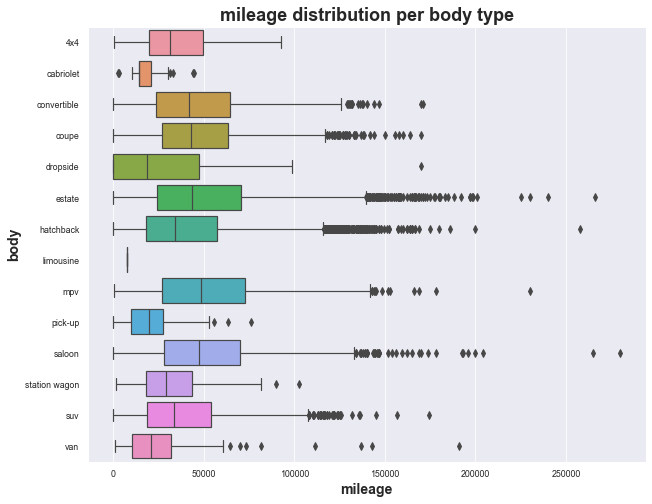

In [370]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(x=df.mileage, y= df.body, data=df, order=sorted(df.body.unique()), orient="h")
sns.set_theme("paper")
plt.xlabel("mileage", fontsize=14,fontweight="bold")
plt.ylabel("body", fontsize=14,fontweight="bold")
plt.title("mileage distribution per body type",fontsize=18,fontweight="bold")
plt.show()

### 4)) Multivariate Analysis

#### mileage distribution by year

<Figure size 720x432 with 0 Axes>

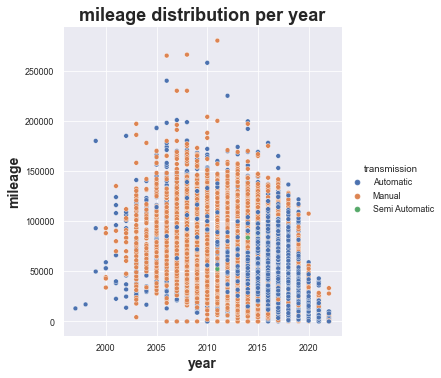

In [324]:
fig = plt.figure(figsize=(10, 6))
sns.relplot(x=df.year, y= df.mileage, hue=df.transmission)
sns.set_theme("paper")
plt.xlabel("year", fontsize=14,fontweight="bold")
plt.ylabel("mileage", fontsize=14,fontweight="bold")
plt.title("mileage distribution per year",fontsize=18,fontweight="bold")
plt.show()

#### engine size distribution by engine power

<Figure size 720x432 with 0 Axes>

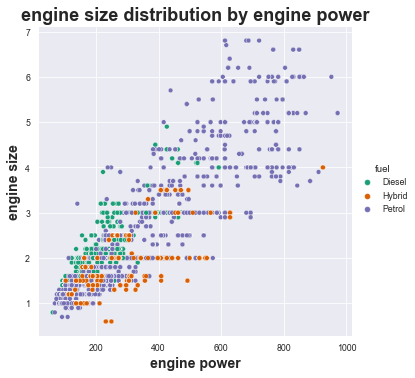

In [329]:
fig = plt.figure(figsize=(10, 6))
sns.relplot(x=df.enginePower, y= df.engineSize, hue=df.fuel, palette="Dark2")
sns.set_theme("paper")
plt.xlabel("engine power", fontsize=14,fontweight="bold")
plt.ylabel("engine size", fontsize=14,fontweight="bold")
plt.title("engine size distribution by engine power",fontsize=18,fontweight="bold")
plt.show()

#### Average miles driven each year

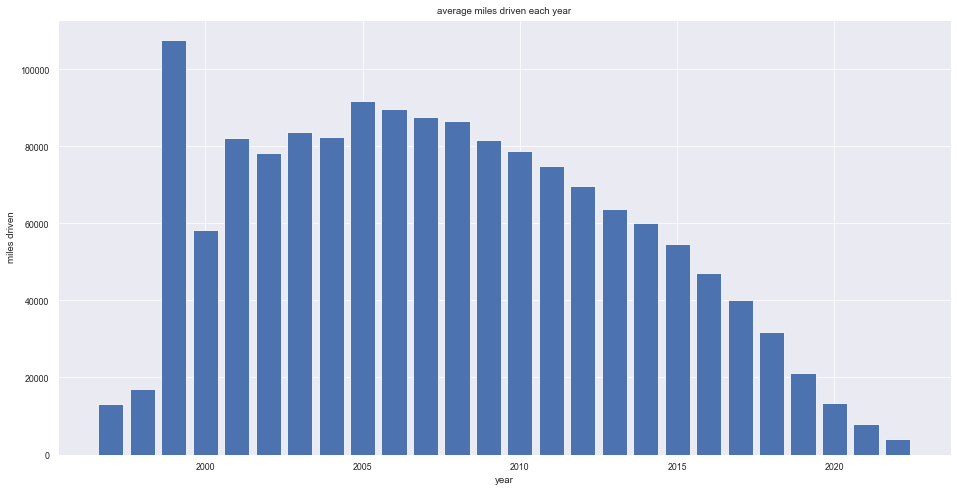

In [377]:
miles_mean = df.groupby("year")["mileage"].mean()
fig,ax = plt.subplots(figsize=(16,8))
ax.bar(miles_mean.index,miles_mean)

ax.set_title("average miles driven each year")
ax.set_xlabel("year")
ax.set_ylabel("miles driven")

plt.show()

#### Year and Selling Price

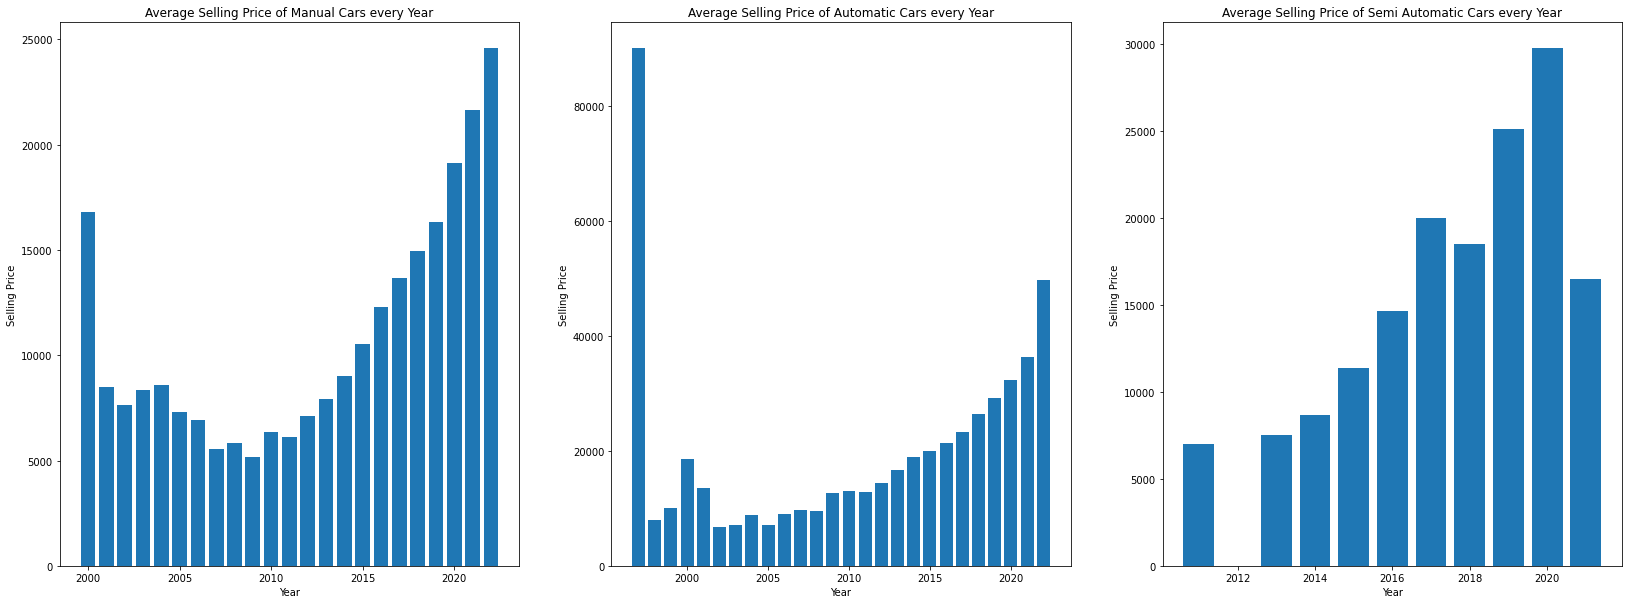

In [10]:
year_mean_manual = df[df["transmission"]=="Manual"].groupby("year")["price"].mean()
year_mean_automatic = df[df["transmission"]=="Automatic"].groupby("year")["price"].mean()
year_mean_semiauto = df[df["transmission"]=="Semi Automatic"].groupby("year")["price"].mean()
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(28,10))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)
ax[2].bar(year_mean_semiauto.index,year_mean_semiauto)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

ax[2].set_title('Average Selling Price of Semi Automatic Cars every Year')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Selling Price')

plt.show()

### Data in 3d

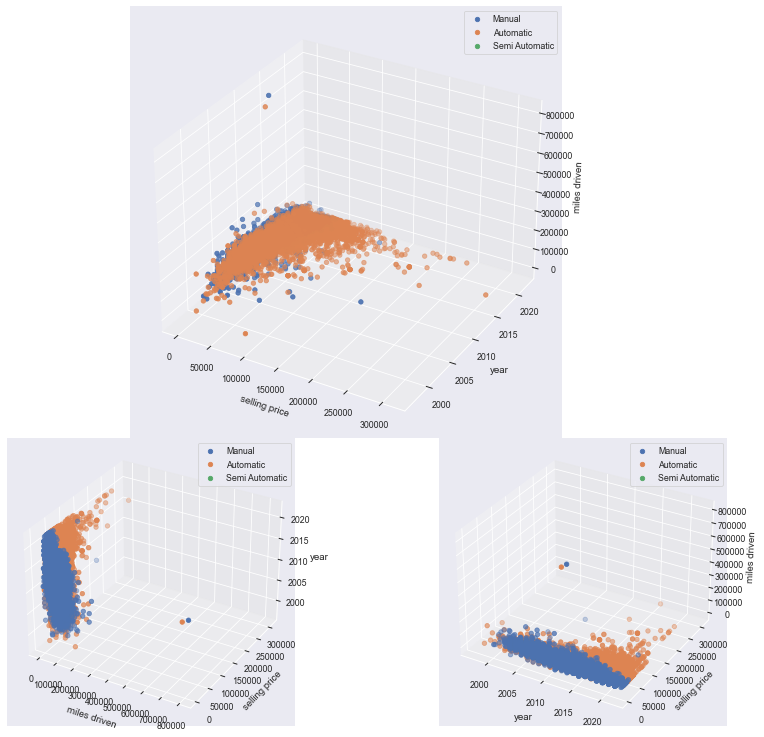

In [195]:
from mpl_toolkits.mplot3d import Axes3D
manual = df[df.transmission == "Manual"]
automatic = df[df.transmission == "Automatic"]
semi_auto = df[df.transmission == "Semi Automatic"]

fig=plt.figure()
ax=fig.add_axes([0.2,0,1.5,1.5], projection='3d')

ax.scatter(manual['price'],manual['year'],manual['mileage'])
ax.scatter(automatic['price'],automatic['year'],automatic['mileage'])
ax.scatter(semi_auto['price'],semi_auto['year'],semi_auto['mileage'])

ax.set_xlabel('selling price')
ax.set_ylabel('year')
ax.set_zlabel('miles driven')

ax.legend(['Manual','Automatic', 'Semi Automatic'])

ax=fig.add_axes([0,-1,1,1], projection='3d')

ax.scatter(manual['mileage'],manual['price'],manual['year'])
ax.scatter(automatic['mileage'],automatic['price'],automatic['year'])
ax.scatter(semi_auto['mileage'],semi_auto['price'],semi_auto['year'])

ax.set_xlabel('miles driven')
ax.set_ylabel('selling price')
ax.set_zlabel('year')

ax.legend(['Manual','Automatic', 'Semi Automatic'])

ax=fig.add_axes([1,-1,1,1], projection='3d')

ax.scatter(manual['year'],manual['price'],manual['mileage'])
ax.scatter(automatic['year'],automatic['price'],automatic['mileage'])
ax.scatter(semi_auto['year'],semi_auto['price'],semi_auto['mileage'])

ax.set_xlabel('year')
ax.set_ylabel('selling price')
ax.set_zlabel('miles driven')

ax.legend(['Manual','Automatic', 'Semi Automatic'])

plt.show()

### Correlation Matrix

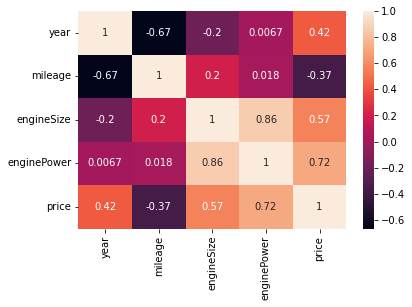

In [21]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### Label Encoding to the  Data

In [27]:
label_encoder = preprocessing.LabelEncoder()
df.make = label_encoder.fit_transform(df.make)
df.model = label_encoder.fit_transform(df.model)
df.body = label_encoder.fit_transform(df.body)
df.fuel = label_encoder.fit_transform(df.fuel)
df.transmission = label_encoder.fit_transform(df.transmission)
df.head()

,make,model,year,body,mileage,fuel,transmission,engineSize,enginePower,price
0,34,327,2018,12,76990,1,0,2.4,241,18200
1,21,512,2014,10,43659,0,0,2.2,222,12990
2,51,340,2013,6,45227,2,1,1.2,82,6495
3,51,224,2017,6,43000,2,0,2.0,299,19700
4,12,425,2015,6,39917,2,1,0.9,122,7600


## Feature Selection

### ANOVA testing (2-way)

In [10]:
# fuel and transmission relationship
engine_model = ols('price ~ C(fuel) + C(transmission) + C(fuel):C(transmission)', data=df).fit()
sm.stats.anova_lm(engine_model, typ=2)

,sum_sq,df,F,PR(>F)
C(fuel),1.309689e+09,2.0,4.911171,7.367437e-03
C(transmission),1.580732e+12,2.0,5927.546649,0.000000e+00
C(fuel):C(transmission),3.557714e+10,4.0,66.704918,2.198640e-56
Residual,6.617553e+12,49630.0,NaN,NaN


In [12]:
# body and make relationship
c_model = ols('price ~ C(body) + C(make) + C(body):C(make)', data=df).fit()
sm.stats.anova_lm(c_model, typ=2)

C:\Users\Balot\PycharmProjects\Environments\draft\venv\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 6
  warnings.warn('covariance of constraints does not have full '
C:\Users\Balot\PycharmProjects\Environments\draft\venv\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 52, but rank is 10
  warnings.warn('covariance of constraints does not have full '
C:\Users\Balot\PycharmProjects\Environments\draft\venv\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 676, but rank is 14
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(body),6.847327e+02,13.0,6.080554e-07,1.000000
C(make),-5.757879e+10,52.0,-1.278276e+01,1.000000
C(body):C(make),1.390429e+10,676.0,2.374474e-01,0.998345
Residual,4.274339e+12,49344.0,NaN,NaN


### Post Hoc Test

In [18]:
# fuel types post hoc test
ph1 = MultiComparison(df.price,df.fuel)
ph1_results = ph1.tukeyhsd()
print(ph1_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj   lower      upper    reject
----------------------------------------------------------
Diesel Hybrid 5634.3319   0.0  4991.7839    6276.88   True
Diesel Petrol -108.3061 0.632  -386.3139   169.7017  False
Hybrid Petrol -5742.638   0.0 -6383.5235 -5101.7525   True
----------------------------------------------------------


In [20]:
# transmission types post hoc test
ph2 = MultiComparison(df.price,df.transmission)
ph2_results = ph2.tukeyhsd()
print(ph2_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
  group1      group2       meandiff  p-adj     lower       upper    reject
--------------------------------------------------------------------------
Automatic         Manual -11553.9305    0.0 -11797.6791 -11310.1818   True
Automatic Semi Automatic  -4960.4844 0.0371  -9687.7592   -233.2097   True
   Manual Semi Automatic   6593.4461 0.0031   1866.3106  11320.5815   True
--------------------------------------------------------------------------


## Modeling

In [60]:
X = df.drop(["price"],axis=1)
y = df.price

In [61]:
X.head(5)

,make,model,year,body,mileage,fuel,transmission,engineSize,enginePower
0,34,327,2018,12,76990,1,0,2.4,241
1,21,512,2014,10,43659,0,0,2.2,222
2,51,340,2013,6,45227,2,1,1.2,82
3,51,224,2017,6,43000,2,0,2.0,299
4,12,425,2015,6,39917,2,1,0.9,122


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [64]:
lr = Lasso()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Evaluating the Algorithm
print('Score:', lr.score(X_test, y_test))
print("Model Name: Lasso Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score: 0.7194024202209316
Model Name: Lasso Regression
Mean Absolute Error: 3833.7550242145326
Mean Squared Error: 48020064.94336546
Root Mean Squared Error: 6929.651141534144


In [73]:
xgboost = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgboost.fit(X_train,y_train)
y_pred = xgboost.predict(X_test)

# Evaluating the Algorithm
print('Score:', xgboost.score(X_test, y_test))
print("Model Name: XGBoost")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[01:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Score: 0.9069634415373521
Model Name: XGBoost
Mean Absolute Error: 2114.3473360736366
Mean Squared Error: 15921810.811772503
Root Mean Squared Error: 3990.2143816808266


In [41]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

# Evaluating the Algorithm
print('Score:', rf.score(X_test, y_test))
print("Model Name: Random Forest")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score: 0.938038459753929
Model Name: Random Forest
Mean Absolute Error: 1316.4564108966713
Mean Squared Error: 10603787.776608752
Root Mean Squared Error: 3256.3457704317507


In [36]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

# Evaluating the Algorithm
print('Score:', dt.score(X_test, y_test))
print("Model Name: Decision Tree")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score: 0.9101002374331222
Model Name: Decision Tree
Mean Absolute Error: 0.1680165014798848
Mean Squared Error: 0.15384995267078347
Root Mean Squared Error: 0.39223711281670365


### Use K Fold cross validation to measure accuracy of our models.

In [32]:
# lasso
cv_lasso = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
np.average(cross_val_score(Lasso(), X, y, cv=cv_lasso))

0.7323618763323883

In [33]:
# xgboost
cv_xgb = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
np.average(cross_val_score(xgb.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123), X, y, cv=cv_xgb))

[23:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:20

0.9160040749138473

In [34]:
# random forest
cv_rf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
np.average(cross_val_score(RandomForestRegressor(), X, y, cv=cv_rf))

0.9534693376027198

In [47]:
# decision tree
cv_dt = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cross_val_score(DecisionTreeRegressor(), X, y, cv=cv_dt)

array([-14474172.63075778, -10359414.57406602, -15989322.99259727,
       -16251760.48014902, -21259817.03353021, -20761822.27106946,
       -13721448.53866756, -22376764.54210851, -13251924.34627548,
       -12313795.89198216])

In [31]:
def grid_search_cv(X,y):
    algos = {
        "lasso" : {
            "model": Lasso(),
            "params": {
                "alpha": [1, 2],
                "selection": ["random", "cyclic"]
            }
        },
        "xgboost": {
            "model": xgb.XGBRegressor(),
            "params": {
                "max_depth":[2, 6, 12],
                "min_child_weight":[1,5,15],
                "learning_rate":[0.3, 0.1, 0.03],
                "n_estimators":[100]
            }
        },
        "random_forest": {
            "model": RandomForestRegressor(),
            "params": {
                "n_estimators": range(1,50,5),
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })

    return pd.DataFrame(scores,columns=["model","best_score","best_params"])

grid_search_cv(X,y)

,model,best_score,best_params
0,lasso,0.729669,"{'alpha': 2, 'selection': 'cyclic'}"
1,xgboost,0.959755,"{'learning_rate': 0.3, 'max_depth': 12, 'min_c..."
2,random_forest,0.954720,{'n_estimators': 36}


In [76]:
model = xgb.XGBRegressor(learning_rate=0.3, max_depth=12)

In [77]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [78]:
def predict_price(make, model, body, fuel, transmission, price, year, mileage, size, power):
    return model.predict([make, model, year, body, mileage, fuel, transmission, size, power])
